<a href="https://colab.research.google.com/github/tanishraja21/Project2/blob/main/698.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fetch the data
!wget https://raw.githubusercontent.com/tanishraja21/Project2/main/DatasetProblem2.csv

--2022-11-12 21:20:34--  https://raw.githubusercontent.com/tanishraja21/Project2/main/DatasetProblem2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1545323 (1.5M) [text/plain]
Saving to: ‘DatasetProblem2.csv’

DatasetProblem2.csv 100%[===================>]   1.47M  --.-KB/s    in 0.06s   

2022-11-12 21:20:34 (26.5 MB/s) - ‘DatasetProblem2.csv’ saved [1545323/1545323]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install causalgraphicalmodels
from causalgraphicalmodels import CausalGraphicalModel
from causalgraphicalmodels.examples import fork, chain, collider
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. 

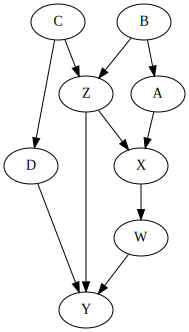

In [3]:
graph = CausalGraphicalModel(
    nodes = ["X","A", "B", "C", "D", "W", "Z","Y",],
    edges = [("A", "X"), ("X", "W"), ("W", "Y"), ("C","Z"),("B","Z"),("Z", "X"), ("Z", "Y"), ("C", "D"), ("D", "Y"),("B", "A")]
)
graph.draw()

2.

In [4]:
graph.get_all_backdoor_paths("X", "Y")


[['X', 'A', 'B', 'Z', 'C', 'D', 'Y'],
 ['X', 'A', 'B', 'Z', 'Y'],
 ['X', 'Z', 'C', 'D', 'Y'],
 ['X', 'Z', 'Y']]

3.

In [5]:
graph.get_all_backdoor_adjustment_sets("X", "Y")

frozenset({frozenset({'C', 'Z'}),
           frozenset({'A', 'C', 'Z'}),
           frozenset({'B', 'Z'}),
           frozenset({'B', 'C', 'Z'}),
           frozenset({'A', 'B', 'C', 'Z'}),
           frozenset({'D', 'Z'}),
           frozenset({'C', 'D', 'Z'}),
           frozenset({'B', 'D', 'Z'}),
           frozenset({'B', 'C', 'D', 'Z'}),
           frozenset({'A', 'Z'}),
           frozenset({'A', 'C', 'D', 'Z'}),
           frozenset({'A', 'B', 'Z'}),
           frozenset({'A', 'D', 'Z'}),
           frozenset({'A', 'B', 'D', 'Z'}),
           frozenset({'A', 'B', 'C', 'D', 'Z'})})

In [6]:
graph.get_all_independence_relationships()

[('Y', 'A', {'D', 'X', 'Z'}),
 ('Y', 'A', {'D', 'W', 'Z'}),
 ('Y', 'A', {'B', 'X', 'Z'}),
 ('Y', 'A', {'C', 'X', 'Z'}),
 ('Y', 'A', {'B', 'W', 'Z'}),
 ('Y', 'A', {'C', 'W', 'Z'}),
 ('Y', 'A', {'B', 'D', 'X', 'Z'}),
 ('Y', 'A', {'D', 'W', 'X', 'Z'}),
 ('Y', 'A', {'C', 'D', 'X', 'Z'}),
 ('Y', 'A', {'B', 'D', 'W', 'Z'}),
 ('Y', 'A', {'C', 'D', 'W', 'Z'}),
 ('Y', 'A', {'B', 'W', 'X', 'Z'}),
 ('Y', 'A', {'B', 'C', 'X', 'Z'}),
 ('Y', 'A', {'C', 'W', 'X', 'Z'}),
 ('Y', 'A', {'B', 'C', 'W', 'Z'}),
 ('Y', 'A', {'B', 'D', 'W', 'X', 'Z'}),
 ('Y', 'A', {'B', 'C', 'D', 'X', 'Z'}),
 ('Y', 'A', {'C', 'D', 'W', 'X', 'Z'}),
 ('Y', 'A', {'B', 'C', 'D', 'W', 'Z'}),
 ('Y', 'A', {'B', 'C', 'W', 'X', 'Z'}),
 ('Y', 'A', {'B', 'C', 'D', 'W', 'X', 'Z'}),
 ('Y', 'X', {'A', 'W', 'Z'}),
 ('Y', 'X', {'D', 'W', 'Z'}),
 ('Y', 'X', {'B', 'W', 'Z'}),
 ('Y', 'X', {'C', 'W', 'Z'}),
 ('Y', 'X', {'A', 'D', 'W', 'Z'}),
 ('Y', 'X', {'A', 'B', 'W', 'Z'}),
 ('Y', 'X', {'A', 'C', 'W', 'Z'}),
 ('Y', 'X', {'B', 'D', 'W', 'Z'}),


In [7]:
print("Are X and Y independent conditioning on {}?",graph.is_d_separated("X", "Y", {}))

print("Are X and Y independent conditioning on {Z3}?",graph.is_d_separated("X", "Y", {"Z"}))

print("Are X and Y independent conditioning on {Z3, Z1}",graph.is_d_separated("X", "Y", {"Z", "A"}))

print("Are X and Y independent conditioning on {Z3, Z1, W}",graph.is_d_separated("X", "Y", {"Z", "A", "W"}))

Are X and Y independent conditioning on {}? False
Are X and Y independent conditioning on {Z3}? False
Are X and Y independent conditioning on {Z3, Z1} False
Are X and Y independent conditioning on {Z3, Z1, W} True


4.

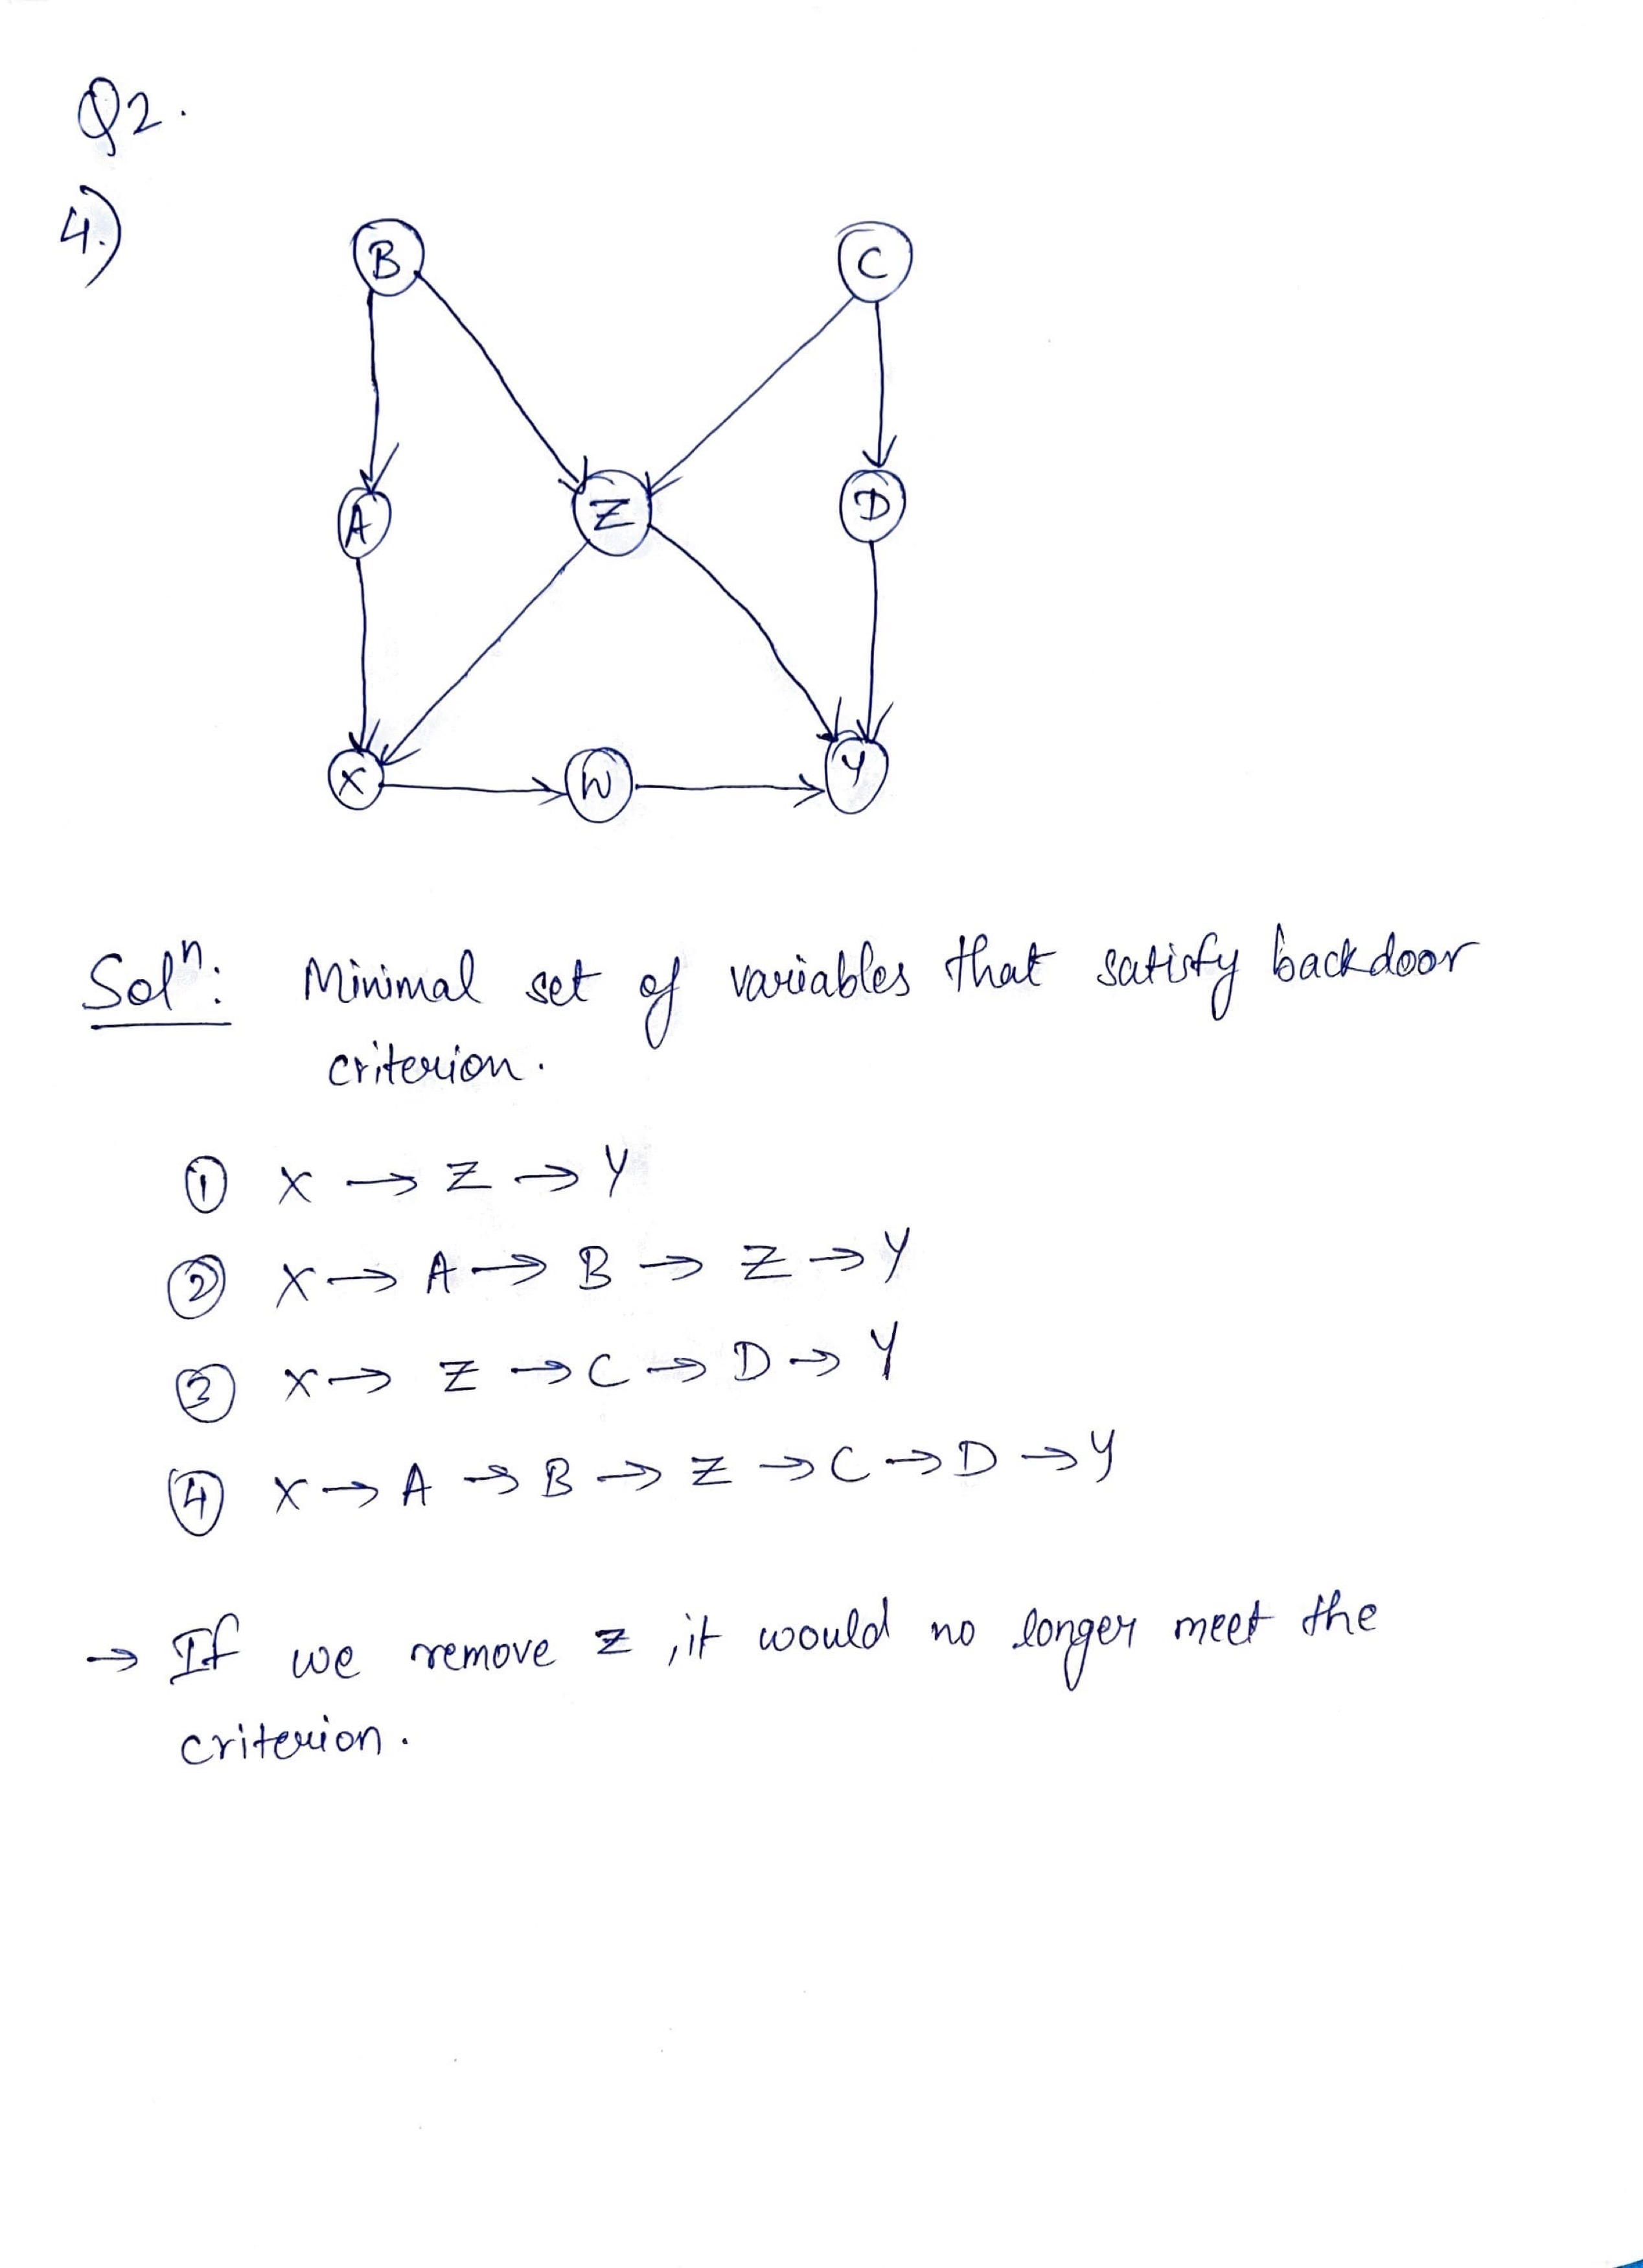

5.

In [8]:
data = pd.read_csv("DatasetProblem2.csv")
data.head()

,A,B,C,D,W,X,Y,Z
0,2.602301,2.164052,0.497883,0.520597,0.455927,1.703984,-1.482663,-0.459168
1,0.839685,0.800157,-0.133231,0.264815,1.588338,2.700699,3.653630,1.032344
2,2.265791,1.378738,2.433600,1.234205,1.163482,1.579211,3.269566,4.030934
3,3.201152,2.640893,0.890649,0.402494,2.631039,2.132182,3.104638,1.219381
4,-0.123011,2.267558,0.522190,0.810416,-1.173674,-1.910518,-0.222856,0.732709


6.

In [18]:
# An approach to causal effect estimation - no bootstrapping
def causalEffectEstimation(data, xColumns, xColumnsLabel, zColumns, yColumns, model = RandomForestClassifier(n_estimators=10)):
    # separate data into treatment, adjustment set, outcome
    # treatment, X
    trainX = data[xColumns]
    # adjustment set, Z
    trainZ = data[zColumns]
    # outcome, Y
    trainY = data[yColumns]
    
    # merge treatment, X and adjustment, Z
    trainXZ = pd.concat([trainX, trainZ], axis = 1)

    # we fit a ML model 
    model.fit(trainXZ, trainY)

    ## Causal effect estimation 

   
    testXZPlacebo = trainXZ.copy()
    testXZPlacebo[xColumns] = 0
  
    testXZTreatment = trainXZ.copy()
    testXZTreatment[xColumns] = 1

      
    placeboEstimate = np.mean(model.predict(testXZPlacebo))
    
    treatmentEstimate = np.mean(model.predict(testXZTreatment))
    
   
    causalEffect = treatmentEstimate - placeboEstimate

    # Print results:    
    print('Placebo estimate:' + str(placeboEstimate))
    print('Treatment estimate:' + str(treatmentEstimate))
    print('Causal effect:' + str(causalEffect))

In [19]:
print("Causal effect of empty adjustment set")
xColumns = ['X']
zColumns = []
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of empty adjustment set
Placebo estimate:0.4234750748075253
Treatment estimate:1.3657157279727234
Causal effect:0.9422406531651981


In [11]:
print("Causal effect of {Z}")
xColumns = ['X']
zColumns = ['Z']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {Z}
Placebo estimate:0.5989919354929034
Treatment estimate:1.2406949952845665
Causal effect:0.6417030597916631


In [12]:
print("Causal effect of {Z,A}")
xColumns = ['X']
zColumns = ['Z','A']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {Z,A}
Placebo estimate:0.5958721445707075
Treatment estimate:1.242917223652848
Causal effect:0.6470450790821406


In [13]:
print("Causal effect of {Z,B}")
xColumns = ['X']
zColumns = ['Z','B']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {Z,B}
Placebo estimate:0.5895335655758037
Treatment estimate:1.247432196100795
Causal effect:0.6578986305249913


In [14]:
print("Causal effect of {Z,C}")
xColumns = ['X']
zColumns = ['Z','C']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {Z,C}
Placebo estimate:0.5893366655354574
Treatment estimate:1.2475724480812278
Causal effect:0.6582357825457704


In [15]:
print("Causal effect of {Z,D}")
xColumns = ['X']
zColumns = ['Z','D']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {Z,D}
Placebo estimate:0.59014465760186
Treatment estimate:1.246996914997093
Causal effect:0.656852257395233


In [16]:
print("Causal effect of {A,B,C,D}")
xColumns = ['X']
zColumns = ['A','B','C','D']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {A,B,C,D}
Placebo estimate:0.47160604215252805
Treatment estimate:1.3314320199633352
Causal effect:0.859825977810807


In [17]:
print("Causal effect of {Z,A,B,C,D}")
xColumns = ['X']
zColumns = ['Z','A','B','C','D']
yColumns = ['Y']
causalEffectEstimation(data, xColumns, 'X', zColumns, yColumns, LinearRegression())

Causal effect of {Z,A,B,C,D}
Placebo estimate:0.5931707959556572
Treatment estimate:1.244841395392138
Causal effect:0.6516705994364808


7.

When we don't have the Z node(backdoor) in the zcolumn, the placebo effect is minimal.
When we don't have the Z node(backdoor) in the zcolumn, the causal effect in minimal.
When we don't have the Z node(backdoor) in the zcolumn, the treatment estimate is maximized.